In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/processed/mall_cleaned.csv')

In [23]:
X_1 = data.iloc[:, [3,4]].values

In [24]:
kmeans_model = {}
kmeans_model["Inertia"] = []
kmeans_model["Clusters"] = []
def calc_inertia(features, end, params):
    inertia = []
    for i in range(1,end):
        model = KMeans(n_clusters= i, init='k-means++', random_state=0)
        model.fit(features)
        inertia.append(model.inertia_)
    params["Inertia"] = inertia
    params["Clusters"] = model.cluster_centers_
calc_inertia(X_1, 20, kmeans_model)
print(kmeans_model["Clusters"])

[[ 27.45        74.8       ]
 [ 45.83333333  30.33333333]
 [ 31.33333333 133.33333333]
 [ 41.3125      74.0625    ]
 [ 22.625       34.125     ]
 [ 39.6        118.4       ]
 [ 65.25        63.625     ]
 [ 33.45454545  22.        ]
 [ 49.6875      59.5       ]
 [ 55.14285714  87.        ]
 [ 59.16666667  23.16666667]
 [ 30.77777778  41.66666667]
 [ 33.93333333  84.66666667]
 [ 37.14285714  59.57142857]
 [ 21.22222222  58.        ]
 [ 64.75        47.58333333]
 [ 21.9         18.2       ]
 [ 35.08333333  99.5       ]
 [ 49.18181818  43.63636364]]


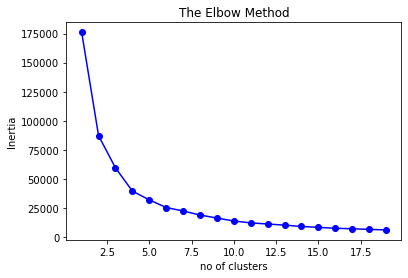

In [25]:
plt.plot(range(1,20), kmeans_model["Inertia"], marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Using k = 5
model = KMeans(n_clusters = 5, init='k-means++', random_state=0)
pred = model.fit_predict(X_1)

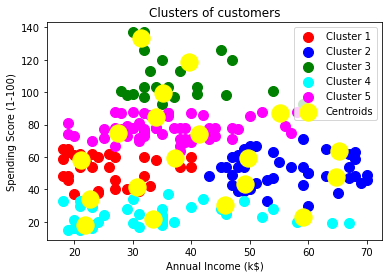

In [27]:
plt.scatter(X_1[pred == 0, 0], X_1[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[pred == 1, 0], X_1[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[pred == 2, 0], X_1[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_1[pred == 3, 0], X_1[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_1[pred == 4, 0], X_1[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_model["Clusters"][:, 0], kmeans_model["Clusters"][:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
X_2 = data[["Age", "Spending_Score"]].values

In [33]:
kmeans_model2 = {}
kmeans_model2["Inertia"] = []
kmeans_model2["Clusters"] = []

calc_inertia(X_1, 20, kmeans_model2)
print(kmeans_model2["Clusters"])

[[ 27.45        74.8       ]
 [ 45.83333333  30.33333333]
 [ 31.33333333 133.33333333]
 [ 41.3125      74.0625    ]
 [ 22.625       34.125     ]
 [ 39.6        118.4       ]
 [ 65.25        63.625     ]
 [ 33.45454545  22.        ]
 [ 49.6875      59.5       ]
 [ 55.14285714  87.        ]
 [ 59.16666667  23.16666667]
 [ 30.77777778  41.66666667]
 [ 33.93333333  84.66666667]
 [ 37.14285714  59.57142857]
 [ 21.22222222  58.        ]
 [ 64.75        47.58333333]
 [ 21.9         18.2       ]
 [ 35.08333333  99.5       ]
 [ 49.18181818  43.63636364]]


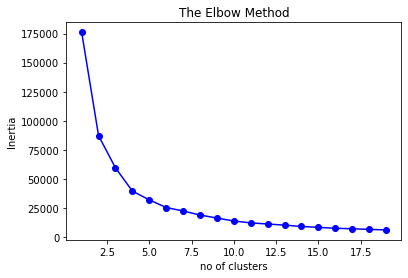

In [34]:
plt.plot(range(1,20), kmeans_model2["Inertia"], marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
# Taking k = 4
model = KMeans(n_clusters = 4, init='k-means++', random_state=0)
pred = model.fit_predict(X_2)

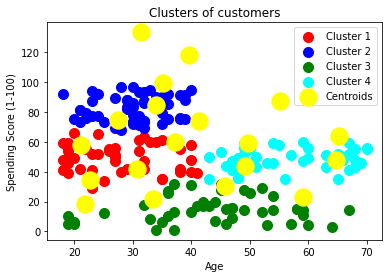

In [36]:
plt.scatter(X_2[pred == 0, 0], X_2[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2[pred == 1, 0], X_2[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[pred == 2, 0], X_2[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_2[pred == 3, 0], X_2[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_2[pred == 4, 0], X_2[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_model2["Clusters"][:, 0], kmeans_model2["Clusters"][:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()